In [1]:
import os
import zipfile

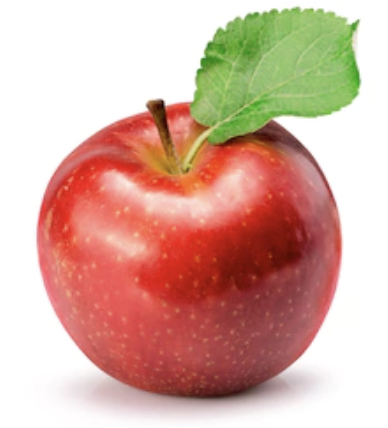

In [2]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img
image_1 = load_img('dataset/train/freshapples/Screen Shot 2018-06-08 at 5.00.12 PM.png')
image_1

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
path = os.path.join('dataset')
train_dir = os.path.join(path,'train')
validation_dir = os.path.join(path,'test')
train_fresh_dir = os.path.join(train_dir,'freshapples')
train_rotten_dir = os.path.join(train_dir,'rottenapples')
validation_fresh_dir = os.path.join(validation_dir,'freshapples')
validation_rotten_dir = os.path.join(validation_dir,'rottenapples')

In [5]:
num_fresh_tr = len(os.listdir(train_fresh_dir))
num_rotten_tr = len(os.listdir(train_rotten_dir))
num_fresh_val = len(os.listdir(validation_fresh_dir))
num_rotten_val = len(os.listdir(validation_rotten_dir))
print('Fresh Apples Training Images: ',num_fresh_tr)
print('Rotten Appes Training Images: ',num_rotten_tr)
print('Fresh Validation Images: ',num_fresh_val)
print('Rotten Validation Images: ',num_rotten_val)
print('Total Training Images: ', num_fresh_tr+num_rotten_tr)
print('Toatal Validation Images: ', num_fresh_val+num_rotten_val)
total_train = num_fresh_tr+num_rotten_tr
total_val = num_fresh_val+num_rotten_val

Fresh Apples Training Images:  1693
Rotten Appes Training Images:  2342
Fresh Validation Images:  395
Rotten Validation Images:  601
Total Training Images:  4035
Toatal Validation Images:  996


In [6]:
batch_size = 100
epochs = 5
IMG_HIEGHT = 224
IMG_WIDHT = 224

In [7]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [8]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                           class_mode='binary')

Found 4035 images belonging to 2 classes.


In [9]:
train_data_gen.class_indices

{'freshapples': 0, 'rottenapples': 1}

In [10]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                              class_mode='binary')

Found 996 images belonging to 2 classes.


In [11]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [12]:
IMAGE_SIZE = [224,224]

In [13]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3],weights='imagenet',include_top=False)#input layer

In [14]:
for layer in vgg.layers:
    layer.trainable = False  #stop training of hidden layers

In [15]:
x = Flatten()(vgg.output)
prediction = Dense(1,activation='sigmoid')(x)

In [16]:
model = Model(inputs=vgg.input,outputs=prediction)

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_data_gen,epochs=epochs,
                             validation_data=val_data_gen)

C:\Users\Dany\.conda\envs\kajal\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5


In [ ]:
sns.set_style('whitegrid')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc=0)
plt.title('Loss')
plt.show()